In [0]:
!unzip AI_CV_assignment2.zip

Archive:  AI_CV_assignment2.zip
   creating: AI_CV/
   creating: AI_CV/Train/
   creating: AI_CV/Train/4/
  inflating: AI_CV/Train/4/obj13__0.png  
  inflating: AI_CV/Train/4/obj13__10.png  
  inflating: AI_CV/Train/4/obj13__15.png  
  inflating: AI_CV/Train/4/obj13__150.png  
  inflating: AI_CV/Train/4/obj13__155.png  
  inflating: AI_CV/Train/4/obj13__160.png  
  inflating: AI_CV/Train/4/obj13__165.png  
  inflating: AI_CV/Train/4/obj13__170.png  
  inflating: AI_CV/Train/4/obj13__175.png  
  inflating: AI_CV/Train/4/obj13__180.png  
  inflating: AI_CV/Train/4/obj13__185.png  
  inflating: AI_CV/Train/4/obj13__190.png  
  inflating: AI_CV/Train/4/obj13__195.png  
  inflating: AI_CV/Train/4/obj13__20.png  
  inflating: AI_CV/Train/4/obj13__200.png  
  inflating: AI_CV/Train/4/obj13__205.png  
  inflating: AI_CV/Train/4/obj13__210.png  
  inflating: AI_CV/Train/4/obj13__215.png  
  inflating: AI_CV/Train/4/obj13__220.png  
  inflating: AI_CV/Train/4/obj13__225.png  
  inflating: AI_CV/

In [0]:
import torch.nn as nn
import torch.nn.functional as F
m=torch.tensor([0.2545,0.2545,0.2545])
v=torch.tensor([0.1479,0.1479,0.1479])
class Net(nn.Module):

    def __init__(self, num_classes=20):
        super(Net, self).__init__()
        print("inside __init__")
        self.conv1=nn.Conv2d(3, 64, 3)
        self.conv1_bn=nn.BatchNorm2d(64)
        self.conv2=nn.Conv2d(64,64,3)
        self.conv2_bn=nn.BatchNorm2d(64)
        self.conv3=nn.Conv2d(64,128,3)
        self.conv3_bn=nn.BatchNorm2d(128)
        self.conv4=nn.Conv2d(128,128,3)
        self.conv4_bn=nn.BatchNorm2d(128)
        self.fc1   = nn.Linear(128*6*6, 20)
        self.fc1_bn=nn.BatchNorm1d(20)
    def forward(self, x):
        #rint("inside forward")
        out = self.conv1_bn(self.conv1(x))
        print("out:",out.shape)
        out = F.relu(out)
        print("out:",out.shape)
        out = F.max_pool2d(out, 2)
        print("out:",out.shape)
        out = self.conv2_bn(self.conv2(out))
        print("out:",out.shape)
        out = F.relu(out)
        print("out:",out.shape)
        out = F.max_pool2d(out, 2)
        print("out:",out.shape)
        out = self.conv3_bn(self.conv3(out))
        print("out:",out.shape) 
        out = F.relu(out)
        print("out:",out.shape)
        out = F.max_pool2d(out, 2)
        print("out:",out.shape)
        out = self.conv4_bn(self.conv4(out))
        print("out:",out.shape)
        out = F.relu(out)
        print("out:",out.shape)
        out = F.max_pool2d(out, 2)
        print("out:",out.shape)
        #rint("out:",out.shape)
        out = out.view(out.size(0), -1)
        print("out:",out.shape)
        #rint(out.shape)
        out = self.fc1_bn(self.fc1(out))
        print("out:",out.shape)
        out = F.relu(out)
        return out

def net(**kwargs):
    model = Net(**kwargs)
    return model

In [0]:
model=net(num_classes=20)
print(model)

inside __init__
Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=20, bias=True)
  (fc1_bn): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [0]:

from torchvision import datasets, transforms
import torch
import numpy as np
root_train="/content/AI_CV/Train"
root_test="/content/AI_CV/Test"

 
print(len(dataset_train))
dataset_train=datasets.ImageFolder(
                root=root_train,
                transform=transforms.Compose([
                   
                    transforms.ToTensor(),
                    
                    transforms.Normalize([0.2545], [0.3846])
                ]))

print(len(dataset_train))

dataset_test=datasets.ImageFolder(
                root=root_test,
                transform=transforms.Compose([
                    transforms.ToTensor(),
 
                    transforms.Normalize([0.2545], [0.3846])
                ]))

dataloaders = torch.utils.data.DataLoader(
            dataset_train,
            batch_size=25, shuffle=True, num_workers=1)

dataloaders_test = torch.utils.data.DataLoader(
            dataset_test,
            batch_size=25, shuffle=True, num_workers=1)


print(len(dataloaders))
for i, data in enumerate(dataloaders):
        inputs,labels = data
        print(np.array(inputs).shape)

print("Loaded {} images under {}".format(len(dataset_train), "train"))
print("Loaded {} images under {}".format(len(dataset_test), "test"))
print("Classes: ")
class_names = dataset_train.classes
print(dataset_train.classes)


1157
1157
47
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(7, 3, 128, 128)
Loaded 1157 images under train
Loaded 277 images under test
Classes: 
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


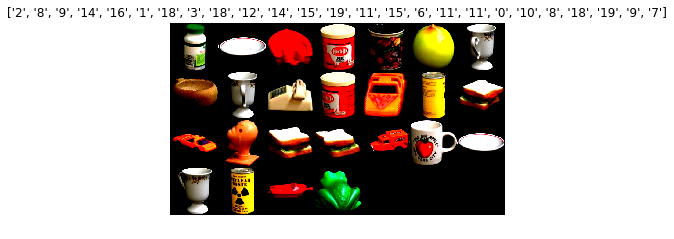

In [0]:
import torchvision
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs,7)
    imshow(out, title=[class_names[x] for x in classes])

inputs, classes = next(iter(dataloaders))
show_databatch(inputs, classes)


In [0]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    avg_loss = 0.0
    avg_acc = 0.0
    avg_loss_test = 0.0
    avg_acc_test = 0.0

    train_batches = len(dataloaders)
    test_batches = len(dataloaders_test)
    
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print('-' * 10)
        
        loss_train = 0
        loss_test = 0
        acc_train = 0
        acc_test = 0
        
        model.train(True)
        
        for i, data in enumerate(dataloaders):
           
            inputs, labels = data
            
            if use_gpu:
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            loss_train += loss.data
            acc_train += torch.sum(preds == labels.data)
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        print()
        avg_loss = loss_train  / len(dataset_train)

        print(10*"*")
        avg_acc = float(acc_train.data) / float(len(dataset_train))
        
        model.train(False)
        model.eval()
            
        for i, data in enumerate(dataloaders_test):
  
                
            inputs, labels = data
            
            if use_gpu:
                inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
            else:
                inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss_test += loss.data
            acc_test += torch.sum(preds == labels.data)
            
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        avg_loss_test = (loss_test) / len(dataset_test)
        avg_acc_test = float(acc_test) / float(len(dataset_test))
        
        print()
        print("Epoch {} result: ".format(epoch))
        print("Avg loss (train): {:.4f}".format(avg_loss))
        print("Avg acc (train): {:.4f}".format(avg_acc))
        print("Avg loss (test): {:.4f}".format(avg_loss_test))
        print("Avg acc (test): {:.4f}".format(avg_acc_test))
        print('-' * 10)
        print()
        
        if avg_acc_test > best_acc:
            best_acc = avg_acc_test
            best_model_wts = copy.deepcopy(model.state_dict())
        
    elapsed_time = time.time() - since
    print()
    print("Training completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Best acc: {:.4f}".format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

In [0]:
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable


use_gpu = torch.cuda.is_available()

if use_gpu:
    model.cuda() 


for param in model.parameters():
    param.requires_grad = True

    
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)



print("Training")
train_model(model, criterion, optimizer_ft, lr_scheduler, 15)



Training
Epoch 0/15
----------
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 63, 63])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 30, 30])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 14, 14])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 6, 6])
out: torch.Size([25, 4608])
out: torch.Size([25, 20])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 63, 63])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 30, 30])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 14, 14])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 6, 6])
out: torch.Size([25, 4608])
out: torch.Size([25, 20])
out: torch.Size([25, 64, 126,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 63, 63])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 30, 30])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 14, 14])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 6, 6])
out: torch.Size([25, 4608])
out: torch.Size([25, 20])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64, 63, 63])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 61, 61])
out: torch.Size([25, 64, 30, 30])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 28, 28])
out: torch.Size([25, 128, 14, 14])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 12, 12])
out: torch.Size([25, 128, 6, 6])
out: torch.Size([25, 4608])
out: torch.Size([25, 20])
out: torch.Size([25, 64, 126, 126])
out: torch.Size([25, 64,

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=20, bias=True)
  (fc1_bn): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

**Average Train Accuracy: 0.9983**